In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace, norm
from scipy.integrate import quad

                                                                MMSE estimation for Laplacian source

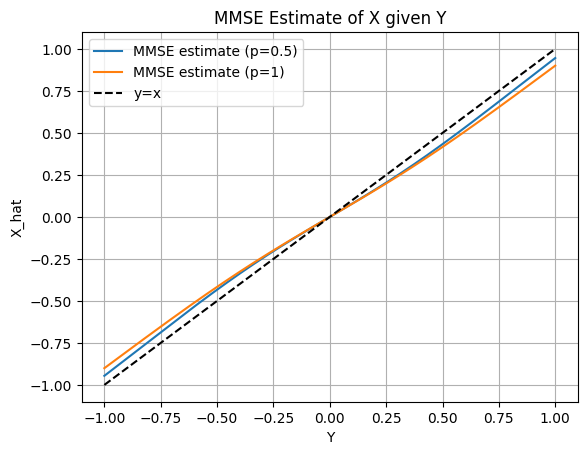

In [10]:
class MMSE:
    def __init__(self, sigma_z, scale_x, p):
        self.sigma = sigma_z
        self.scale = scale_x
        self.p = p
    
    def conditional_pdf(self, y, x):
        z = y - x
        gaussian_pdf = 1 / (np.sqrt(2 * np.pi) * self.sigma) * np.exp(-0.5 * (z / self.sigma) ** 2)
        return gaussian_pdf
    
    def pdf_x(self, x):
        laplacian_pdf = 1 / (2 * self.scale) * np.exp(-(np.abs(x) / self.scale) ** self.p)
        return laplacian_pdf
    
    def MMSE_estimate(self, y):
        x = np.linspace(-500, 500, 10000)
        integrand_values = x * self.pdf_x(x) * self.conditional_pdf(y, x)
        integral_result = np.trapz(integrand_values, x)
    
        integrand_den_values = self.pdf_x(x) * self.conditional_pdf(y, x)
        normalization = np.trapz(integrand_den_values, x)
    
        return integral_result / normalization
    

# Parameters
scale_x = 1
sigma_z = np.sqrt(0.1)
p_values = [0.5, 1]

# Creating MMSE instances for different p values and plot
for p in p_values:
    mmse = MMSE(sigma_z, scale_x, p)  
    
    # Generating range of y values
    y_values = np.linspace(-1, 1, 10000)
    
    # Computing MMSE estimate for each y value
    x_hat_values = [mmse.MMSE_estimate(y) for y in y_values]
    
    # Plot function
    plt.plot(y_values, x_hat_values, label=f'MMSE estimate (p={p})')

# Plot y=x line
plt.plot(y_values, y_values, color='black', linestyle='--', label='y=x')

plt.xlabel('Y')
plt.ylabel('X_hat')
plt.title('MMSE Estimate of X given Y')
plt.legend() 
plt.grid(True)
plt.show()



                                                        MAP estimation for Laplacian source (Did it additionally)

In [11]:
sigma_X = 1
sigma_sq_Z = 0.1
t=(sigma_sq_Z/sigma_X)

def map_estimate(Y):
    Y_length=len(Y)
    X_hat_arr=np.zeros(Y_length)
    for i in range(Y_length):
        if (Y[i]>t):
            X_hat_arr[i]=Y[i]-t
        elif (Y[i]<-t):
            X_hat_arr[i]=Y[i]+t
    return X_hat_arr

Y_values = np.linspace(-1, 1, 1000)
X_hat_values = map_estimate(Y_values)

In [12]:
sigma_X = 1
sigma_sq_Z = 0.1
t=(sigma_sq_Z/sigma_X)

def map_estimate(Y):
    Y_length=len(Y)
    X_hat_arr=np.zeros(Y_length)
    for i in range(Y_length):
        if (Y[i]>t):
            X_hat_arr[i]=Y[i]-t
        elif (Y[i]<-t):
            X_hat_arr[i]=Y[i]+t
    return X_hat_arr

Y_values = np.linspace(-1, 1, 1000)
X_hat_values = map_estimate(Y_values)

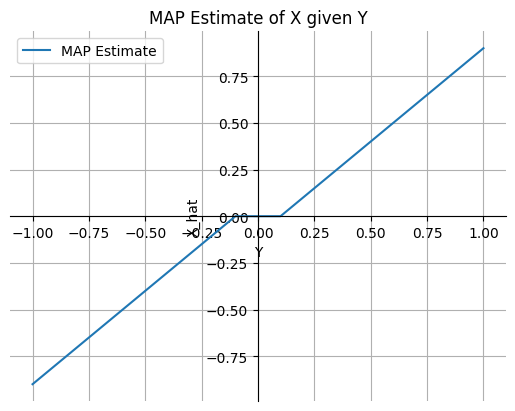

In [14]:
fig, ax = plt.subplots()
ax.plot(Y_values, X_hat_values, label='MAP Estimate')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Set ticks positions
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Center the ticks at (0, 0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Labeling and title
ax.set_xlabel('Y')
ax.set_ylabel('X_hat')
ax.set_title('MAP Estimate of X given Y')
ax.legend()
plt.grid(True)

plt.show()